### Importing Library

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import cv2 as cv
import numpy as np 

### Input Output Methods

In [17]:
def show(img):
    cv.imshow("", img)    
    cv.waitKey()           
    cv.destroyAllWindows()
def disp(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

In [3]:
# Capture image
cap = cv.VideoCapture(0)
if (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv.imshow("NAME", frame)            
        cv.waitKey()
        cv.imwrite("img2.jpg",frame)
cap.release()
cv.destroyAllWindows()

QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


In [4]:
# image Resize 
img = frame[100:400,130:330]

In [5]:
a = 20

In [6]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j,0]<200 and img[i,j,1]<230 and img[i,j,2]<200:
            img[i,j]+=a
        

In [7]:
show(img)


## Basic Image Operartions 

### Geometrical Transformation

#### Scaling Image

In [122]:
# Resizing Image
cv.resize(img,(800,1200),interpolation=cv.INTER_CUBIC)

In [124]:
import re
for i in dir(cv):
    if re.match("INTER_.*", i):
        print("cv2."+i)

cv2.INTER_AREA
cv2.INTER_BITS
cv2.INTER_BITS2
cv2.INTER_CUBIC
cv2.INTER_LANCZOS4
cv2.INTER_LINEAR
cv2.INTER_LINEAR_EXACT
cv2.INTER_MAX
cv2.INTER_NEAREST
cv2.INTER_NEAREST_EXACT
cv2.INTER_TAB_SIZE
cv2.INTER_TAB_SIZE2


#### Translation 

Shifting of an object location 
Translation Matrix is 
$$ M = \begin{bmatrix} 
I_2 & T \end{bmatrix}
=\begin{bmatrix} 
1&0 & t_x\\
0&1& t_y
    \end{bmatrix}
$$

Translation operation is performed by ``` cv.wrapAffine```function

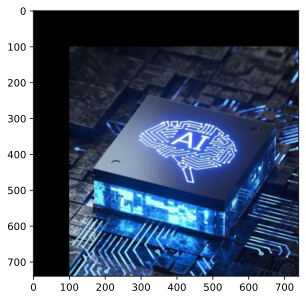

In [39]:

img = cv.imread('img.jpg',cv.IMREAD_UNCHANGED)
rows,cols,_ = img.shape
M = np.matrix(
    '''1, 0, 100;
       0, 1, 100
    ''',dtype=np.float32)

translated_img = cv.warpAffine(img,M,(cols+100,rows+100))
disp(translated_img )

#### Rotatin 

Rotation of an image for an angle θ is achieved by the transformation matrix of the form
$$ R = \begin{bmatrix} 
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta\\
\end{bmatrix}
$$
```getRotationMatrix2D(center, angle, scale)``` function give the rotation matrix

In [41]:
center=np.array([img.shape[0],img.shape[1]])/2
R = cv.getRotationMatrix2D(center,40,1)

In [46]:
transformed_img = cv.warpAffine(img, R,(1000,1000))

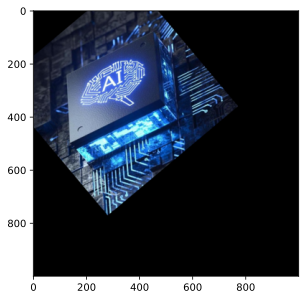

In [47]:
disp(transformed_img)

# Convolution Operation 

In [21]:
# let define kernel 
kernel1 = np.matrix('-1,0,1;-1,0,1;-1,0,1')

In [24]:
transformed_img = cv.filter2D(src = img, ddepth = -1, kernel = kernel1)

In [25]:
show(transformed_img)